<a href="https://colab.research.google.com/github/Dharanish2/Codsoft-project/blob/main/Movie_Ticket_and_Rating_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task - 2 Movie Rating Prediction


Author:- Dharanish

Batch- Feb'25

In [ ]:
# Import the Libraries for the Data Processing and Modelling
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving IMDb Movies India.csv to IMDb Movies India (1).csv


In [ ]:
#Linking the datasets to colab
import io
df_data = pd.read_csv(io.BytesIO(uploaded['IMDb Movies India (1).csv']), encoding='latin-1')

In [ ]:
df_data.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,-1997.0,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,-2005.0,142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,-2008.0,59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,-2012.0,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,-2014.0,116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [ ]:
df_data.shape

(15509, 10)

In [ ]:
df_data.isnull().sum()

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  float64
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.2+ MB


In [ ]:
df_data.duplicated().sum()

6

In [ ]:
df_data.dropna(inplace=True)

In [ ]:
df_data.isnull().sum()

,0
Name,0
Year,0
Duration,0
Genre,0
Rating,0
Votes,0
Director,0
Actor 1,0
Actor 2,0
Actor 3,0


In [ ]:
df_data.duplicated().sum()

0

In [ ]:
df_data.shape

(5659, 10)

In [ ]:
df_data.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [ ]:
print(df_data.head())  # First few rows
print(df_data.info())  # Column info and missing values

                                 Name    Year Duration  \
1  #Gadhvi (He thought he was Gandhi) -2019.0  109 min   
3                             #Yaaram -2019.0  110 min   
5                ...Aur Pyaar Ho Gaya -1997.0  147 min   
6                           ...Yahaan -2005.0  142 min   
8                  ?: A Question Mark -2012.0   82 min   

                       Genre  Rating  Votes        Director          Actor 1  \
1                      Drama     7.0      8   Gaurav Bakshi     Rasika Dugal   
3            Comedy, Romance     4.4     35      Ovais Khan          Prateik   
5     Comedy, Drama, Musical     4.7    827    Rahul Rawail       Bobby Deol   
6        Drama, Romance, War     7.4  1,086  Shoojit Sircar  Jimmy Sheirgill   
8  Horror, Mystery, Thriller     5.6    326   Allyson Patel        Yash Dave   

                  Actor 2          Actor 3  
1          Vivek Ghamande    Arvind Jangid  
3              Ishita Raj  Siddhant Kapoor  
5  Aishwarya Rai Bachchan    Shammi

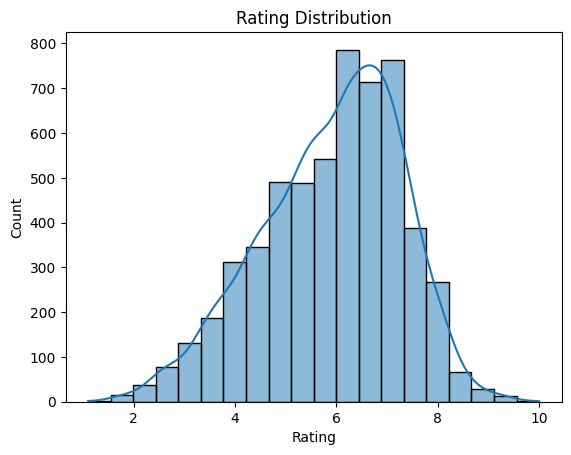

In [ ]:
sns.histplot(df_data['Rating'], bins=20, kde=True)
plt.title('Rating Distribution')
plt.show()

            Year    Rating
Year    1.000000  0.204642
Rating  0.204642  1.000000


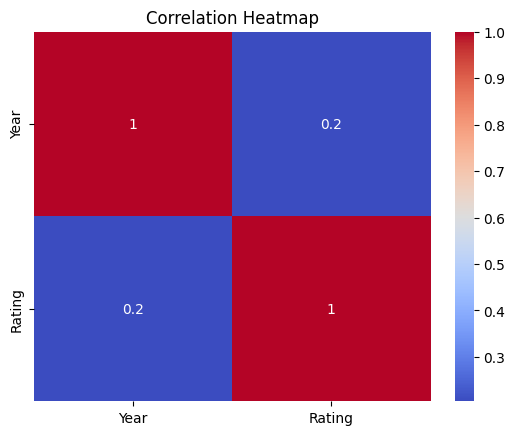

In [ ]:
print(df_data.corr(numeric_only=True)) # add the numeric_only argument
sns.heatmap(df_data.corr(numeric_only=True), annot=True, cmap='coolwarm') # add the numeric_only argument
plt.title('Correlation Heatmap')
plt.show()

Data Pre-Processing

In [ ]:
# Convert the 'Year' column to string type before using .str
df_data['Year'] = df_data['Year'].astype(str).str.replace(r' [()]', '', regex=True)

# Now convert it back to integers
df_data['Year'] = pd.to_numeric(df_data['Year'], errors='coerce').astype('Int64')

In [ ]:
# Remove the min word from 'Duration' column and convert all values to numeric
df_data['Duration'] = pd.to_numeric(df_data['Duration'].str.replace('min', ''))
df_data['Duration']

,Duration
1,109
3,110
5,147
6,142
8,82
...,...
15493,115
15494,153
15503,125
15505,129


In [ ]:
# Splitting the genre by, to keep only unique genres and replacing the null values with mode
df_data['Genre'] = df_data['Genre'].str.split(', ')

df_data = df_data.explode('Genre')

df_data['Genre'].fillna(df_data['Genre'].mode()[0], inplace=True)

<ipython-input-19-7cabb3eb9235>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_data['Genre'].fillna(df_data['Genre'].mode()[0], inplace=True)


In [ ]:
# Convert 'Votes to numeric and replace the, to keep only numerical part
df_data['Votes'] = pd.to_numeric(df_data["Votes"].str.replace(',', ''))
df_data['Votes']

,Votes
1,8
3,35
3,35
5,827
5,827
...,...
15503,44
15505,655
15505,655
15508,20


In [ ]:
# Checking the dataset is there any null values present sent and data types of the features present
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11979 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      11979 non-null  object 
 1   Year      11979 non-null  Int64  
 2   Duration  11979 non-null  int64  
 3   Genre     11979 non-null  object 
 4   Rating    11979 non-null  float64
 5   Votes     11979 non-null  int64  
 6   Director  11979 non-null  object 
 7   Actor 1   11979 non-null  object 
 8   Actor 2   11979 non-null  object 
 9   Actor 3   11979 non-null  object 
dtypes: Int64(1), float64(1), int64(2), object(6)
memory usage: 1.0+ MB


In [ ]:
df_data.describe

<bound method NDFrame.describe of                                      Name   Year  Duration    Genre  Rating  \
1      #Gadhvi (He thought he was Gandhi)  -2019       109    Drama     7.0   
3                                 #Yaaram  -2019       110   Comedy     4.4   
3                                 #Yaaram  -2019       110  Romance     4.4   
5                    ...Aur Pyaar Ho Gaya  -1997       147   Comedy     4.7   
5                    ...Aur Pyaar Ho Gaya  -1997       147    Drama     4.7   
...                                   ...    ...       ...      ...     ...   
15503                     Zulm Ki Zanjeer  -1989       125    Drama     5.8   
15505                               Zulmi  -1999       129   Action     4.5   
15505                               Zulmi  -1999       129    Drama     4.5   
15508                        Zulm-O-Sitam  -1998       130   Action     6.2   
15508                        Zulm-O-Sitam  -1998       130    Drama     6.2   

       Votes         Director       Actor 1                 Actor 2  \
1          8    Gaurav Bakshi  Rasika Dugal          Vivek Ghamande   
3         35       Ovais Khan       Prateik              Ishita Raj   
3         35       Ovais Khan       Prateik              Ishita Raj   
5        827     Rahul Rawail    Bobby Deol  Aishwarya Rai Bachchan   
5        827     Rahul Rawail    Bobby Deol  Aishwarya Rai Bachchan   
...      ...              ...           ...                     ...   
15503     44  S.P. Muthuraman   Chiranjeevi              Jayamalini   
15505    655       Kuku Kohli  Akshay Kumar          Twinkle Khanna   
15505    655       Kuku Kohli  Akshay Kumar          Twinkle Khanna   
15508     20     K.C. Bokadia    Dharmendra              Jaya Prada   
15508     20     K.C. Bokadia    Dharmendra              Jaya Prada   

               Actor 3  
1        Arvind Jangid  
3      Siddhant Kapoor  
3      Siddhant Kapoor  
5        Shammi Kapoor  
5        Shammi Kapoor  
...                ...  
15503      Rajinikanth  
15505      Aruna Irani  
15505      Aruna Irani  
15508      Arjun Sarja  
15508      Arjun Sarja  

[11979 rows x 10 columns]>

In [ ]:
print(df_data.isnull().sum())

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64


Data Visualizing

In [ ]:
# Assuming df-data is the final DataFrame containing the 'Year' column
year = px.histogram(df_data, x='Year', histnorm='probability density', nbins=40)
year.show()

In [ ]:
# Group data by Year and calculate the average rating
# Replace 'Genre' with the correct column name if it was changed
avg_rating_by_year = df_data.groupby(['Year','Genre'])['Rating'].mean().reset_index()

# Get the top 10 genres
top_genres = df_data['Genre'].value_counts().head(10).index

# Filter the data to include only the top 3 genres
average_rating_by_year = avg_rating_by_year[avg_rating_by_year['Genre'].isin(top_genres)]

# Create the line plot with Plotly Express
fig = px.line(average_rating_by_year, x='Year', y='Rating', color='Genre')

# Updating the details into chart like title and hue
fig.update_layout(title="Average Rating by Year for Top Genres",
                  xaxis_title="Year",
                  yaxis_title="Average Rating")

# Show the plot
fig.show()

In [ ]:
#This histogram shows the probable density with its ratings
ratings_fig = px.histogram(df_data, x='Rating', nbins=20, histnorm='probability density')
ratings_fig.update_layout(title="Rating Distribution", xaxis_title="Rating", yaxis_title="Probability Density")
ratings_fig.show()

In [ ]:
# Importing essential libraries for model building
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Dropping Name column because it doesn't impact the outcome
df_data.drop('Name', axis=1, inplace=True)

In [ ]:
# Grouping the columns with their average rating and then creating a new feature

genre_mean_rating = df_data.groupby('Genre')['Rating'].transform('mean')
df_data['Genre_mean_rating'] = genre_mean_rating

director_mean_rating = df_data.groupby('Director')['Rating'].transform('mean')
df_data['Director_encoded'] = director_mean_rating

actor1_mean_rating = df_data.groupby('Actor 1')['Rating'].transform('mean')
df_data['Actor1_encoded'] = actor1_mean_rating

actor2_mean_rating = df_data.groupby('Actor 2')['Rating'].transform('mean')
df_data['Actor2_encoded'] = actor2_mean_rating

actor3_mean_rating = df_data.groupby('Actor 3')['Rating'].transform('mean')
df_data['Actor3_encoded'] = actor3_mean_rating

In [ ]:
x = df_data[['Year', 'Duration', 'Genre_mean_rating', 'Director_encoded', 'Actor1_encoded', 'Actor2_encoded', 'Actor3_encoded']]
y = df_data['Rating']

In [ ]:
#splitting the dataset into training and testing parts
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Learning the model

In [ ]:
Model = LinearRegression()
Model.fit(x_train, y_train)
Model_pred = Model.predict(x_test)

In [ ]:
#Evaluating the model performance
print('The performance of Logistic Regression is below','/n')
print('Mean Absolute Error:', mean_absolute_error(y_test, Model_pred))
print('Mean Squared Error:', mean_squared_error(y_test, Model_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, Model_pred)))
print('R2 Score:', r2_score(y_test, Model_pred))
print('Accuracy Score:', Model.score(x_test, y_test))
print('Cross Validation Score:', cross_val_score(Model, x, y, cv=5).mean())

The performance of Logistic Regression is below /n
Mean Absolute Error: 0.49713442778104827
Mean Squared Error: 0.45491154926519856
Root Mean Squared Error: 0.6744713109281955
R2 Score: 0.7596933018879729
Accuracy Score: 0.7596933018879729
Cross Validation Score: 0.7652254373086634


Model Final Testing

In [ ]:
x.head(10)

,Year,Duration,Genre_mean_rating,Director_encoded,Actor1_encoded,Actor2_encoded,Actor3_encoded
1,-2019,109,6.056744,7.000000,6.850000,7.000000,7.000000
3,-2019,110,5.751042,4.400000,5.250000,4.400000,4.460000
3,-2019,110,5.811087,4.400000,5.250000,4.400000,4.460000
5,-1997,147,5.751042,5.335135,4.793617,5.730000,5.930000
5,-1997,147,6.056744,5.335135,4.793617,5.730000,5.930000
5,-1997,147,6.246845,5.335135,4.793617,5.730000,5.930000
6,-2005,142,6.056744,7.407143,5.456863,6.828571,6.671429
6,-2005,142,5.811087,7.407143,5.456863,6.828571,6.671429
6,-2005,142,5.981818,7.407143,5.456863,6.828571,6.671429
8,-2012,82,4.817327,5.600000,5.600000,5.812500,5.600000


In [ ]:
y.head(10)

,Rating
1,7.0
3,4.4
3,4.4
5,4.7
5,4.7
5,4.7
6,7.4
6,7.4
6,7.4
8,5.6


In [ ]:
#For testing, we create a new dataframe with values close to any of our existing data to evaluate.
# The columns must match those used during training (x)

data = {'Year': [2019], 'Duration': [111], 'Genre_mean_rating': [5.8],
        'Director_encoded': [4.5], 'Actor1_encoded': [5.3], 'Actor2_encoded': [4.5],
        'Actor3_encoded': [5.0]}  # Adding the missing 'Actor3_encoded' column and a sample value.

#Remove the column "Votes" as this is not a column in X
#del data["Votes"] #remove the unnecessary column Votes

trail = pd.DataFrame(data)

In [ ]:
#predict the movie rating with given data
df_data = Model.predict(trail)

#Display the results from the model
print("Predicted rating:", df_data[0])

Predicted rating: -3.8326917701776035
